In [187]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from datetime import date

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [188]:
# Input ticker - Using META as example
meta_ticker = yf.Ticker("META")

# Getting historical data of META
meta_historical = meta_ticker.history(period='max')
meta_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...
2022-10-12 00:00:00-04:00,128.320007,129.669998,126.250000,127.500000,34605200,0,0
2022-10-13 00:00:00-04:00,123.529999,131.139999,122.529999,130.289993,34325700,0,0
2022-10-14 00:00:00-04:00,131.000000,131.789993,126.519997,126.760002,23538600,0,0


In [193]:
def getReturns(closingPrices):
  return pd.concat([pd.Series(np.nan), closingPrices.diff().reset_index(drop=True)[1:].reset_index(drop=True).div(closingPrices[:-1].reset_index(drop=True))]).reset_index(drop=True)

meta_historical_returns = getReturns(meta_historical['Close'])
meta_historical_returns.index = meta_historical.index
meta_historical['Returns'] = meta_historical_returns
meta_historical = meta_historical[1:]


/var/folders/kz/rvchp60d4w32sw9xqslynkzm0000gn/T/ipykernel_3829/1359409128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_historical['Returns'] = meta_historical_returns


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0,0,-0.089039
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0,0,0.032258
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0,0,0.032187
2012-05-25 00:00:00-04:00,32.900002,32.950001,31.110001,31.910000,37149800,0,0,-0.033909
2012-05-29 00:00:00-04:00,31.480000,31.690001,28.650000,28.840000,78063400,0,0,-0.096208
...,...,...,...,...,...,...,...,...
2022-10-12 00:00:00-04:00,128.320007,129.669998,126.250000,127.500000,34605200,0,0,-0.008091
2022-10-13 00:00:00-04:00,123.529999,131.139999,122.529999,130.289993,34325700,0,0,0.021882
2022-10-14 00:00:00-04:00,131.000000,131.789993,126.519997,126.760002,23538600,0,0,-0.027093


In [190]:
# Saving max historical of META
meta_historical.to_csv('../Data/Structured_Data/meta_historical_max.csv')

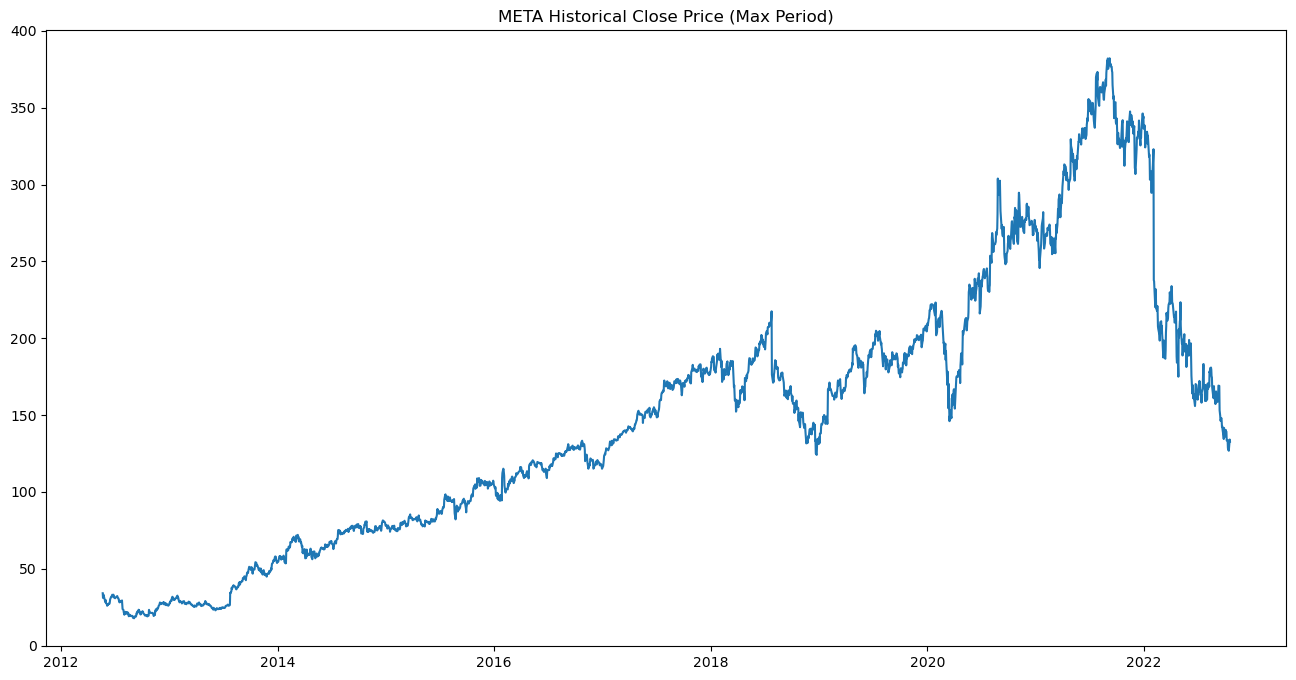

In [191]:
plt.figure(figsize=(16,8))
plt.plot(meta_historical.index, meta_historical["Close"], label='Close Price History')

plt.title('META Historical Close Price (Max Period)')
plt.show()

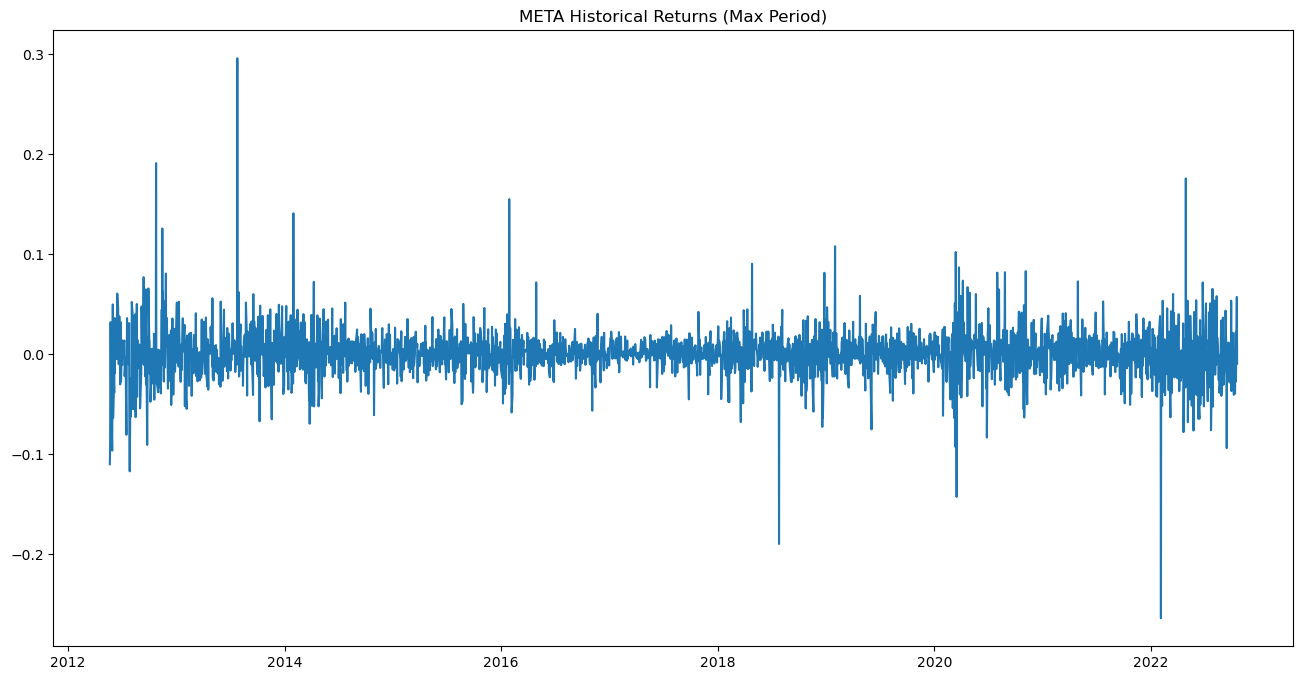

In [192]:
plt.figure(figsize=(16,8))
plt.plot(meta_historical.index, meta_historical["Returns"], label='Close Price History')

plt.title('META Historical Returns (Max Period)')
plt.show()

### Choosing Returns over Close Price
Predicting Close Price is a trivial model as the model can just predict the exact same Closing Price of the previous day. i.e. model(t) = model(t-1) and there will be a high r-squared value.

Hence, we choose to predict returns instead of close price.

In [180]:
# Normalizing
meta_historical_close = meta_historical[['Close']]
meta_historical_x = meta_historical[['Returns', 'Volume']] # Volume
# meta_historical_volume = meta_historical[['Volume']] # Volume

# Spliting into Train and Test Data
train_test_split = int(len(meta_historical_returns) * 0.8)
meta_historical_x_train = meta_historical_x.iloc[:train_test_split]
meta_historical_x_test = meta_historical_x.iloc[train_test_split:]

# meta_historical_volume_train = meta_historical_volume.iloc[:train_test_split]
# meta_historical_volume_test = meta_historical_volume.iloc[train_test_split:]

# Scaling based on Training Data
scaler_returns = MinMaxScaler(feature_range=(0,1))
scaled_returns_data = scaler_returns.fit_transform(meta_historical_x_train) # scale only after split
# scaler_volume = MinMaxScaler(feature_range=(0,1))
# scaled_volume_data = scaler_volume.fit_transform(meta_historical_volume)
# train_classification_y = np.where(np.array(meta_historical_returns_train) > 0,1 , 0)

x_train_data, y_train_data = [], []
num_input_points = 3

# Creating Training Data
for i in range(num_input_points, train_test_split):
    x_train_data.append(scaled_returns_data[i-num_input_points:i])
    # x_train_data.append(scaled_volume_data[i-num_input_points:i, 0])
    y_train_data.append(scaled_returns_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
# print(x_train_data.shape)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 2)) # shape is ((2019, 60), 1)
x_train_data

array([[[0.20705213, 0.26665244],
        [0.45677654, 0.18825721],
        [0.45663118, 0.12327838]],

       [[0.45677654, 0.18825721],
        [0.45663118, 0.12327838],
        [0.32055388, 0.08687846]],

       [[0.45663118, 0.12327838],
        [0.32055388, 0.08687846],
        [0.19229267, 0.20067124]],

       ...,

       [[0.40980098, 0.04729786],
        [0.34801816, 0.05257092],
        [0.37899853, 0.03615905]],

       [[0.34801816, 0.05257092],
        [0.37899853, 0.03615905],
        [0.3868121 , 0.05056588]],

       [[0.37899853, 0.03615905],
        [0.3868121 , 0.05056588],
        [0.43886545, 0.03494808]]])

In [177]:
scaled_returns_data

array([[0.20705213, 0.26665244],
       [0.45677654, 0.18825721],
       [0.45663118, 0.12327838],
       ...,
       [0.3868121 , 0.05056588],
       [0.43886545, 0.03494808],
       [0.32310329, 0.06472156]])

In [140]:
x_train_data

array([[[0.20705213],
        [0.45677654],
        [0.45663118],
        ...,
        [0.37054106],
        [0.27408098],
        [0.47320056]],

       [[0.45677654],
        [0.45663118],
        [0.32055388],
        ...,
        [0.27408098],
        [0.47320056],
        [0.26120472]],

       [[0.45663118],
        [0.32055388],
        [0.19229267],
        ...,
        [0.47320056],
        [0.26120472],
        [0.30540168]],

       ...,

       [[0.39394806],
        [0.41523285],
        [0.39407161],
        ...,
        [0.40980098],
        [0.34801816],
        [0.37899853]],

       [[0.41523285],
        [0.39407161],
        [0.41635505],
        ...,
        [0.34801816],
        [0.37899853],
        [0.3868121 ]],

       [[0.39407161],
        [0.41635505],
        [0.32050291],
        ...,
        [0.37899853],
        [0.3868121 ],
        [0.43886545]]])

In [121]:
# Continuous
# Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(Dense(60, activation='relu', input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(Dense(120, activation='relu'))
# lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
# lstm_model.add(LSTM(units=50))
# lstm_model.add(LSTM(units=50, return_sequences=True))
# lstm_model.add(LSTM(units=50, return_sequences=True))
# lstm_model.add(LSTM(units=50))
# lstm_model.add(LSTM(units=50))
# lstm_model.add(Dense(50))
# lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1)) 

lstm_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])
lstm_model.fit(x_train_data,y_train_data,epochs=5,batch_size=20,verbose=1)

Epoch 1/5
  1/102 [..............................] - ETA: 44s - loss: 0.1164 - mean_squared_error: 0.1164

2022-10-17 18:41:06.028278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 2s 11ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 2/5
102/102 [==============================] - 1s 10ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 3/5
102/102 [==============================] - 1s 9ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 4/5
102/102 [==============================] - 1s 9ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/5
102/102 [==============================] - 1s 9ms/step - loss: 0.0024 - mean_squared_error: 0.0024


In [182]:
# Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 2)))

# lstm_model.add(LSTM(units=50))
# lstm_model.add(LSTM(units=50, return_sequences=True))
# lstm_model.add(LSTM(units=50, return_sequences=True))
# lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(LSTM(units=50))
# lstm_model.add(LSTM(units=50))
# lstm_model.add(Dense(50))
# lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1)) 

lstm_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error'])
lstm_model.fit(x_train_data,y_train_data,epochs=20, batch_size=20,verbose=1)

Epoch 1/20


2022-10-17 19:04:11.011334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 19:04:11.325058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 19:04:11.418854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 19:04:11.644062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 19:04:11.791611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 4s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0815
Epoch 2/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0025 - mean_absolute_error: 0.0338
Epoch 3/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0025 - mean_absolute_error: 0.0334
Epoch 4/20
105/105 [==============================] - 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0333
Epoch 5/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0024 - mean_absolute_error: 0.0330
Epoch 6/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0025 - mean_absolute_error: 0.0331
Epoch 7/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0024 - mean_absolute_error: 0.0330
Epoch 8/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0024 - mean_absolute_error: 0.0327
Epoch 9/20
105/105 [==============================] - 1s 13ms/step - loss: 0.0024 - mean_absolute_error: 0.0331
Epo

In [23]:
# Saving trained model of 

lstm_model.save("LSTM_Model_Victor_train_data_scaled_30_30.h5")
# !cp LSTM_Model_Victor_train_data_scaled.h5 "drive/My Drive/NUS/Y4S1/BT4222/BT4222 Project/"


In [186]:
# Preparing Test data
test_input = meta_historical_x[train_test_split - num_input_points:].values # 2605 rows, 2078 train, 527 test
print(test_input)
test_input = test_input.reshape(-1,1) # 
print(test_input.shape)
test_input = scaler_returns.transform(test_input) 

X_test = []
for i in range(num_input_points, test_input.shape[0]):
    X_test.append(test_input[i - num_input_points:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler_returns.inverse_transform(predicted_closing_price)
predicted_closing_price


[[-1.72533468e-03  2.40938000e+07]
 [ 2.35582178e-02  1.84785000e+07]
 [-3.26702297e-02  2.91834000e+07]
 ...
 [-8.09081485e-03  3.46052000e+07]
 [ 2.18823003e-02  3.43257000e+07]
 [-2.70933405e-02  2.35386000e+07]]
(1054, 1)


/Users/victorwongyd/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but MinMaxScaler is expecting 2 features as input.

/var/folders/kz/rvchp60d4w32sw9xqslynkzm0000gn/T/ipykernel_3829/3847836065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predicted_closing_price


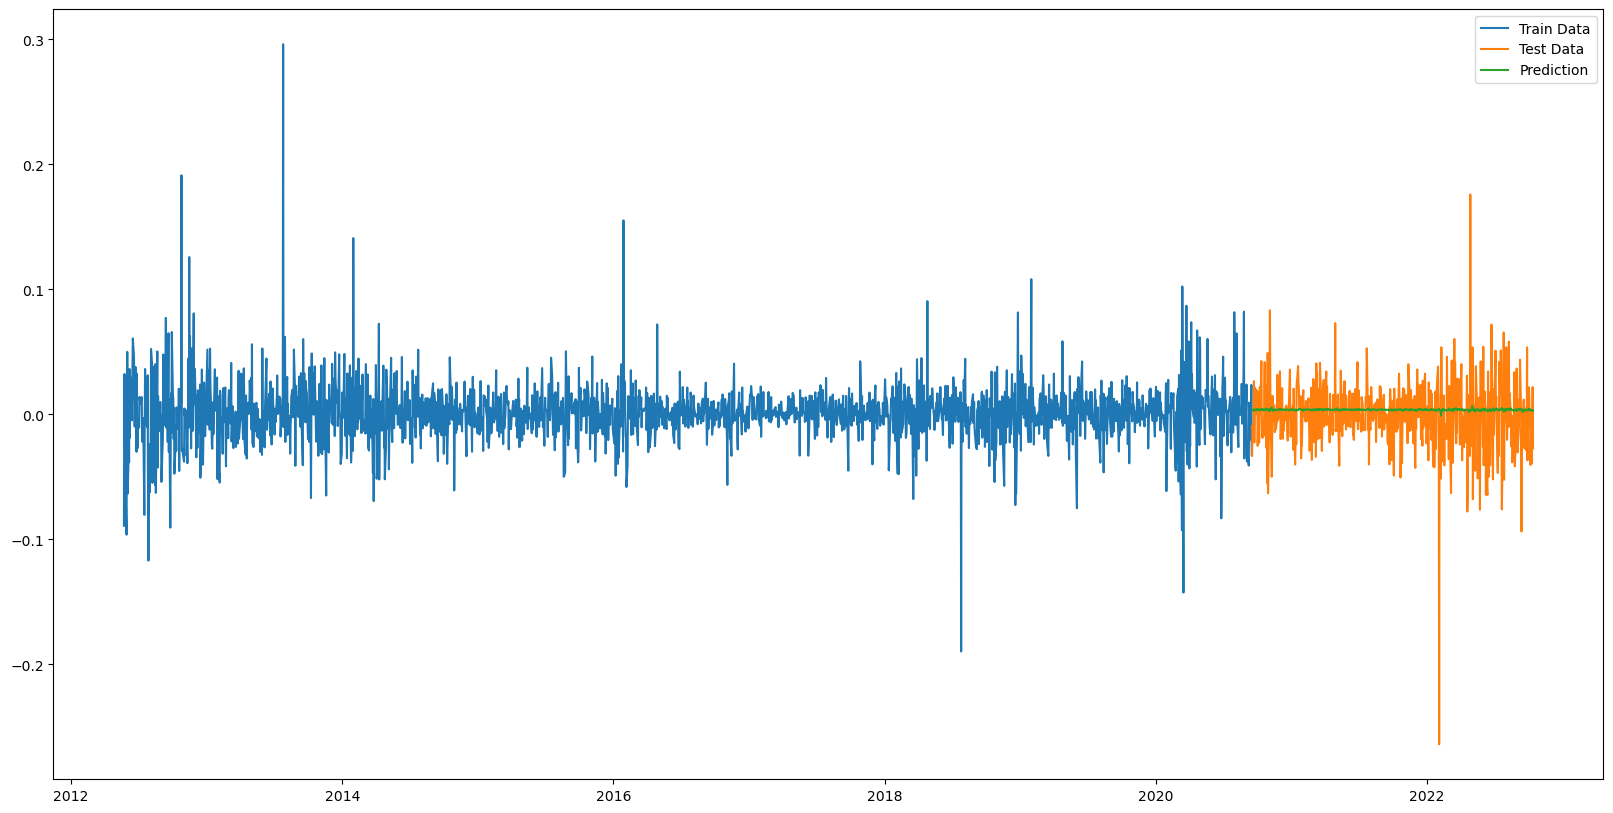

In [156]:
# Visualize the predicted stock costs with actual stock cost
train_data = meta_historical_returns[:train_test_split]
test_data = meta_historical_returns[train_test_split:]
test_data['Predictions'] = predicted_closing_price
plt.plot(train_data['Returns'])
plt.plot(test_data['Returns'])
plt.plot(test_data['Predictions'])
plt.legend(['Train Data', 'Test Data', 'Prediction'])

# plt.legend()
plt.show()


In [157]:
r2_score(test_data['Returns'], test_data['Predictions'])

-0.030967879232509876

In [151]:
mean_squared_error(test_data['Returns'], test_data['Predictions'])

0.0008332358768981151

In [152]:
mean_absolute_error(test_data['Returns'], test_data['Predictions'])

0.02013376003896164